### Notebook for Base Measurements Pipeline for OS, Docker and Service Mesurements and Load Testing for DB

In [129]:
import pandas as pd
import os 

# Define the base directory and subdirectories
dir_base_measurement = "base_measurement"
dirs_analysis = [
    '1_bare_os', 
    '2_bare_os_w_docker', 
    '3_bare_os_w_docker_python-flask', 
    '4_bare_os_docker_python-flask_w_load', 
    '5_bare_os_w_python-flask', 
    '6_bare_os_python-flask_w_load', 
    'db_load_testing'
]
base_dir = 'data/out'

# Initialize an empty dictionary to store DataFrames
data_dict = {}

# Iterate through each directory
for dir_analysis in dirs_analysis:
    data_dict[dir_analysis] = []  # Initialize a list to store DataFrames for this directory
    
    # Iterate through all files in the directory
    dir_path = f"{base_dir}/{dir_base_measurement}/{dir_analysis}"
    if not os.path.exists(dir_path):
        print(f"Directory does not exist: {dir_path}")
        continue
    
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            file_path = f"{dir_path}/{file}"
            print(f"Reading file: {file_path}")
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            if dir_analysis != 'db_load_testing':
                df.columns = [f"{col}_{file.split(' ')[1]}" if col != "Timestamp" else "Timestamp" for col in df.columns]
                
            # Append the DataFrame to the list for this directory
            data_dict[dir_analysis].append(df)
    
    # Concatenate all DataFrames for this directory into one on axis=1
    if data_dict[dir_analysis]:
        data_dict[dir_analysis] = pd.concat(data_dict[dir_analysis], axis=1)
    else:
        data_dict[dir_analysis] = pd.DataFrame()  # Create an empty DataFrame if no data was found

Reading file: data/out/base_measurement/1_bare_os/Main energy - Ace.csv
Reading file: data/out/base_measurement/1_bare_os/Main voltage - Ace.csv
Reading file: data/out/base_measurement/1_bare_os/Main current - Ace.csv
Reading file: data/out/base_measurement/1_bare_os/Main power - Ace.csv
Reading file: data/out/base_measurement/2_bare_os_w_docker/Main energy - Ace.csv
Reading file: data/out/base_measurement/2_bare_os_w_docker/Main voltage - Ace.csv
Reading file: data/out/base_measurement/2_bare_os_w_docker/Main current - Ace.csv
Reading file: data/out/base_measurement/2_bare_os_w_docker/Main power - Ace.csv
Reading file: data/out/base_measurement/3_bare_os_w_docker_python-flask/Main energy - Ace.csv
Reading file: data/out/base_measurement/3_bare_os_w_docker_python-flask/Main voltage - Ace.csv
Reading file: data/out/base_measurement/3_bare_os_w_docker_python-flask/Main current - Ace.csv
Reading file: data/out/base_measurement/3_bare_os_w_docker_python-flask/Main power - Ace.csv
Reading f

In [130]:
# check data
print(data_dict.keys())
print(len(data_dict['1_bare_os']))
data_dict['1_bare_os'].head()

dict_keys(['1_bare_os', '2_bare_os_w_docker', '3_bare_os_w_docker_python-flask', '4_bare_os_docker_python-flask_w_load', '5_bare_os_w_python-flask', '6_bare_os_python-flask_w_load', 'db_load_testing'])
3024151


,Timestamp,Value_energy,Timestamp,Value_voltage,Timestamp,Value_current,Timestamp,Value_power
0,0.00000,0.000000e+00,0.00000,5.001103,0.00000,0.593475,0.00000,2.968031
1,0.00002,1.648906e-08,0.00002,5.000925,0.00002,0.594281,0.00002,2.971954
2,0.00004,3.299992e-08,0.00004,5.000446,0.00004,0.592555,0.00004,2.963039
3,0.00006,4.946125e-08,0.00006,5.000576,0.00006,0.594260,0.00006,2.971640
4,0.00008,6.597036e-08,0.00008,5.000857,0.00008,0.593406,0.00008,2.967537


In [132]:
from datetime import datetime

# helper functions 
def save_plot(fig, plot_type="base_measurements", filename_suffix="base_power_comparison"):
    """
    Save a plot to a specific directory with a timestamped filename.
    """
    dir_out = f"plots/{plot_type}"
    
    current_time = datetime.now().strftime("%Y-%m-%d_%H:%M")  # Format: YYYY-MM-DD_HH
    
    # Create the directory if it doesn't exist
    os.makedirs(dir_out, exist_ok=True)
        
    # Save the figure
    fig.savefig(
        os.path.join(dir_out, f"{filename_suffix}_{current_time}.png"),
        bbox_inches='tight',
        dpi=150,
        facecolor='white'
    )
    print(f"saved as {filename_suffix} at {dir_out}")
    
    
def customize_boxplot(bplot, colors, tick_color, median_color):
    """
    Helper function to customize the appearance
    """
    # Customize the box colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set(color=color, linewidth=1.5)  # Set box outline color and line width
        patch.set(facecolor=color, alpha=0.64)  # Fill the box with the specified color

    # Customize the whiskers
    for whisker in bplot['whiskers']:
        whisker.set(color=tick_color, linewidth=1.5)  # Set whisker color and line width

    # Customize the caps
    for cap in bplot['caps']:
        cap.set(color=tick_color, linewidth=1.5)  # Set cap color and line width

    # Customize the medians
    for median in bplot['medians']:
        median.set(color=median_color, linewidth=1.5)  # Set median line color
        
flierprops = {
        'marker': 'o',
        'markerfacecolor': '#D7B0FF',
        'markeredgecolor': '#978AB5',
        'markersize': 2,
        'linestyle': 'none',
        'alpha': 0.2,
}

---
### Histogram of Time Taken for DB Load Testing

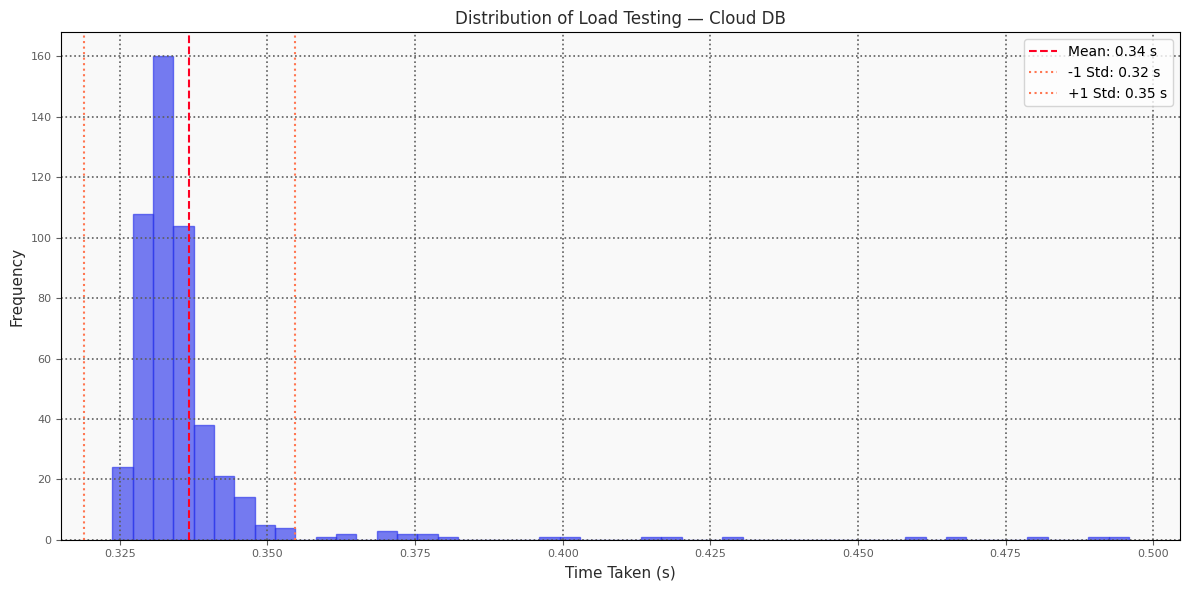

In [134]:
import matplotlib.pyplot as plt

time_taken = data_dict['db_load_testing']['time_taken']

mean_time = time_taken.mean()
std_time = time_taken.std()

# Settings for the plot
labels_fontsize = 11
labels_fontcolor = "#2A2A2A"
title_fontsize = 12
tick_color = "#5D5D5D"
color = '#2933EB'

# Plot the histogram
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')  # Create figure and axes
fig.patch.set_facecolor('#FFFFFF')
ax.set_facecolor('#F9F9F9')

ax.hist(
    time_taken,
    bins=50,  # Use 40 bins for the histogram
    color=color,
    alpha=0.64,
    edgecolor=color,
    linewidth=1,
)

ax.axvline(mean_time, color='#FF0023', linestyle='--', linewidth=1.5, label=f'Mean: {mean_time:.2f} s')
ax.axvline(mean_time - std_time, color='#FF7651', linestyle=':', linewidth=1.5, label=f'-1 Std: {mean_time - std_time:.2f} s')
ax.axvline(mean_time + std_time, color='#FF7651', linestyle=':', linewidth=1.5, label=f'+1 Std: {mean_time + std_time:.2f} s')

# Set title and labels
ax.set_title('Distribution of Load Testing — Cloud DB', color=labels_fontcolor, fontsize=title_fontsize)
ax.set_xlabel('Time Taken (s)', color=labels_fontcolor, fontsize=labels_fontsize)
ax.set_ylabel('Frequency', color=labels_fontcolor, fontsize=labels_fontsize)

# gridlines
ax.grid(True, linestyle='dotted', linewidth=1.2, color=tick_color)

# legend
ax.legend(loc='upper right', fontsize=10)

# ticks
ax.tick_params(labelsize=8, color=tick_color, labelcolor=tick_color)

# # Add text annotation for standard deviation
# ax.text(
#     0.95, 0.85, 
#     f'Standard Deviation: {std_time:.2f} s', 
#     transform=ax.transAxes, 
#     fontsize=12, 
#     color='black', 
#     ha='right', 
#     bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.7)
# )

plt.tight_layout()

# Show the plot
plt.show()

In [135]:
# print standard deviation and mean
print(f"Mean Time: {mean_time:.2f} s")
print(f"Standard Deviation: {std_time:.2f} s")

Mean Time: 0.34 s
Standard Deviation: 0.02 s


In [136]:
# coefficient of variation (CV)
cv = (std_time / mean_time) * 100
print(f"Coefficient of Variation: {cv:.2f} %")

Coefficient of Variation: 5.31 %


In [110]:
# Save the plot
save_plot(fig, filename_suffix="load_testing_histogram")

saved as load_testing_histogram at plots/base_measurements


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_58669/401539864.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(


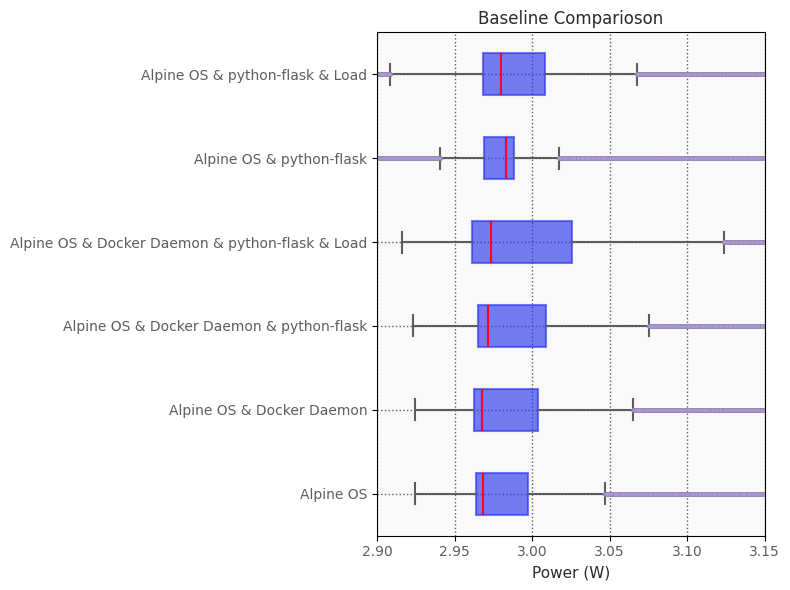

In [102]:
services = [
    '1_bare_os', 
    '2_bare_os_w_docker', 
    '3_bare_os_w_docker_python-flask', 
    '4_bare_os_docker_python-flask_w_load', 
    '5_bare_os_w_python-flask', 
    '6_bare_os_python-flask_w_load'
]
metric = 'Value_power'  # Define the metric to compare - possible power, delta, energy

# Prepare data for plotting
grouped_data = []
labels = []
group_colors = ['#2933EB', '#2933EB', '#2933EB', '#2933EB', '#2933EB', '#2933EB']  # Colors for the services (blue, green) currently
median_color = '#FF0023'
legend_labels = ['Alpine OS', 'Alpine OS & Docker Daemon', 'Alpine OS & Docker Daemon & python-flask', 'Alpine OS & Docker Daemon & python-flask & Load', 'Alpine OS & python-flask', 'Alpine OS & python-flask & Load']

for i, service in enumerate(services):
    # grouping 
    df_service = data_dict[service]
    service_metric_data = df_service[metric].dropna() 
    grouped_data.append(service_metric_data)
    labels.append(legend_labels[i])

# Plotting
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')
ax.set_facecolor('#F9F9F9')

# Box plot
bplot = ax.boxplot(
    grouped_data,
    patch_artist=True,
    widths=0.5,
    labels=labels,
    flierprops=flierprops,
    vert=False
)
    
customize_boxplot(bplot, group_colors, tick_color, median_color)

# Set title and labels
ax.set_title(f'Baseline Comparioson', color=labels_fontcolor, fontsize=title_fontsize)
ax.set_ylabel(f'', color=labels_fontcolor, fontsize=labels_fontsize)
ax.set_xlabel(f'Power (W)', color=labels_fontcolor, fontsize=labels_fontsize)

# Customize tick labels
ax.tick_params(axis='x', labelsize=10, rotation=0, labelcolor='#5D5D5D')
ax.tick_params(axis='y', labelsize=10, labelcolor='#5D5D5D')
ax.grid(True, linestyle='dotted', linewidth=1.0, color=tick_color)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color, alpha=0.8) for color in group_colors]
# ax.legend(handles, legend_labels, loc='upper right', fontsize=10)

# Optional set y-axis limits for better visualization
ax.set_xlim(2.9, 3.15)

plt.tight_layout()
plt.show()

In [59]:
# save the plot
save_plot(fig, filename_suffix="base_power_comparison")

dict_keys(['1_bare_os', '2_bare_os_w_docker', '3_bare_os_w_docker_python-flask', '4_bare_os_docker_python-flask_w_load', '5_bare_os_w_python-flask', '6_bare_os_python-flask_w_load', 'db_load_testing'])


---
**1. Percentage Overhead of Docker:**

In [113]:
mean_os = data_dict['1_bare_os']['Value_power'].mean()
mean_docker = data_dict['2_bare_os_w_docker']['Value_power'].mean()
percentage_overhead = ((mean_docker - mean_os) / mean_os) * 100
print(f"Docker daemon overhead: {percentage_overhead:.2f}%")

Docker daemon overhead: 0.02%


---
**2. Delta Power (Absolute Difference):**

In [95]:
delta_power = mean_docker - mean_os
print(f"Absolute power increase due to Docker daemon: {delta_power:.4f} W")

Absolute power increase due to Docker daemon: 0.0006 W


---
**3. Percentage of Overhead of Docker Deamon & python-flask with load**

In [96]:
mean_os = data_dict['6_bare_os_python-flask_w_load']['Value_power'].mean()
mean_docker = data_dict['4_bare_os_docker_python-flask_w_load']['Value_power'].mean()
percentage_overhead = ((mean_docker - mean_os) / mean_os) * 100
print(f"Docker daemon & python-flask with load overhead: {percentage_overhead:.2f}%")

Docker daemon & python-flask with load overhead: 1.16%


---
**4. Delta Power (Absolute Difference):**

In [98]:
delta_power = mean_docker - mean_os
print(f"Absolute power increase due to Docker daemon & python-flask running with load: {delta_power:.4f} W")

Absolute power increase due to Docker daemon & python-flask running with load: 0.0354 W


---
**Power Variance or Stability:**
* Hypothesis: Docker does not significantly increase the variability of power consumption.
* Low variability suggests that Docker's resource usage is consistent and efficient.

In [112]:
std_os = data_dict['1_bare_os']['Value_power'].std()
std_docker = data_dict['2_bare_os_w_docker']['Value_power'].std()
print(f"Power variability (bare OS): {std_os:.4f} W")
print(f"Power variability (Docker): {std_docker:.4f} W")

Power variability (bare OS): 0.0395 W
Power variability (Docker): 0.0402 W


---
**Impact Relative to Workload:**
* Comparison of Docker's power consumption with and without a containerized workload (e.g., Python Flask):
* A small relative impact emphasizes that Docker's contribution to overall energy usage is minimal compared to the workload.

In [116]:
mean_flask = data_dict['3_bare_os_w_docker_python-flask']['Value_power'].mean()
relative_impact = (mean_docker - mean_os) / (mean_flask - mean_os) * 100
print(f"Comparison Docker consumption with and without a containerized workload: {relative_impact:.2f}%")


Comparison Docker consumption with and without a containerized workload: 14.23%
